In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [117]:
df = pd.read_csv("post_transfer_with_general_positions.csv")

# Clean Column Names
df.columns = df.columns.str.strip()

df.head()

,Player Name,Average Rating,Defending - Aerial duels won,Defending - Blocked,Defending - Dribbled past,Defending - Duels won,Defending - Fouls committed,Defending - Interceptions,Defending - Penalties conceded,Defending - Possession won final 3rd,...,ShootingRank - Shots,ShootingRank - Shots on target,Season_Year,ShootingRank - Penalty goals,Passing - Expected assists (xA),ShootingRank - Expected goals (xG),ShootingRank - xG on target (xGOT),Unnamed: 47,ShootingRank - Non-penalty xG,Position
0,Aaron Lennon,6.58,0.41,0.23,1.40,4.24,1.10,0.52,0.06,0.58,...,0.70,0.23,2021.0,0.06,0.03,0.07,NaN,NaN,0.07,Attack
1,Aaron Mooy,6.86,0.65,0.34,1.46,4.35,0.56,0.99,0.00,0.60,...,1.42,0.34,2019.0,0.07,NaN,NaN,NaN,NaN,NaN,Midfield
2,Adam Armstrong,6.66,0.58,0.64,0.42,2.82,0.99,0.26,0.00,0.52,...,2.34,0.85,2021.5,0.06,0.07,0.22,NaN,NaN,0.22,Attack
3,Adam Webster,6.94,3.20,0.10,0.53,5.26,0.64,1.58,0.04,0.12,...,0.70,0.24,2019.5,0.07,NaN,NaN,NaN,NaN,NaN,Defense
4,Adama Traore,7.10,1.89,0.51,0.51,12.34,1.43,0.53,0.00,0.54,...,1.70,0.56,2018.5,NaN,NaN,NaN,NaN,NaN,NaN,Attack


In [118]:
# Descriptive Stats for Average Rating and Minutes Played
print("\n📊 Descriptive Stats for 'Average Rating':")
print(df['Average Rating'].describe())

print("\n📊 Descriptive Stats for 'Minutes Played':")
print(df['Minutes Played'].describe())


📊 Descriptive Stats for 'Average Rating':
count    148.000000
mean       6.848784
std        0.186507
min        6.350000
25%        6.720000
50%        6.830000
75%        6.942500
max        7.700000
Name: Average Rating, dtype: float64

📊 Descriptive Stats for 'Minutes Played':
count     148.000000
mean     1500.625000
std       695.359303
min        63.000000
25%       964.625000
50%      1524.750000
75%      1884.125000
max      3319.500000
Name: Minutes Played, dtype: float64


In [119]:
# Compute Min, Max, Mean, Median
rating_min = df['Average Rating'].min()
rating_max = df['Average Rating'].max()
rating_mean = df['Average Rating'].mean()
rating_median = df['Average Rating'].median()

minutes_min = df['Minutes Played'].min()
minutes_max = df['Minutes Played'].max()
minutes_mean = df['Minutes Played'].mean()
minutes_median = df['Minutes Played'].median()

print(f"\n🔹 Average Rating - Min: {rating_min}, Max: {rating_max}, Mean: {rating_mean:.2f}, Median: {rating_median}")
print(f"🔹 Minutes Played - Min: {minutes_min}, Max: {minutes_max}, Mean: {minutes_mean:.2f}, Median: {minutes_median}")


🔹 Average Rating - Min: 6.35, Max: 7.7, Mean: 6.85, Median: 6.83
🔹 Minutes Played - Min: 63.0, Max: 3319.5, Mean: 1500.62, Median: 1524.75


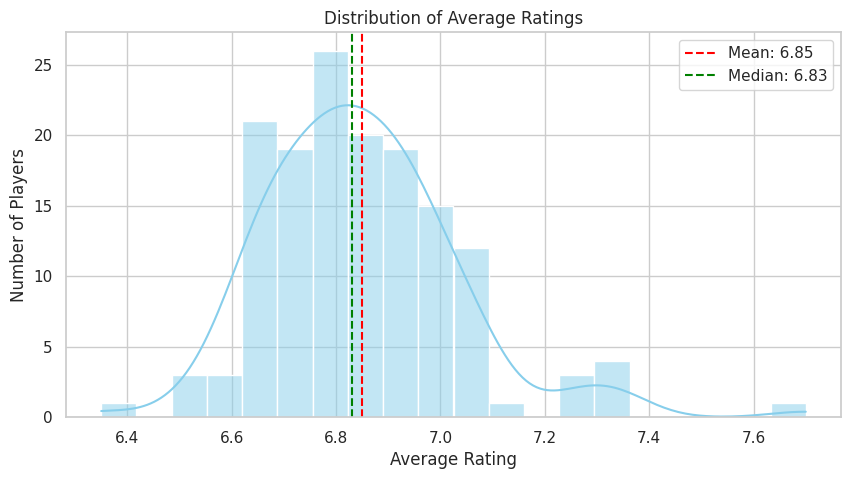

In [120]:
# Histogram of Average Rating
plt.figure(figsize=(10, 5))
sns.histplot(df['Average Rating'], bins=20, kde=True, color='skyblue')
plt.axvline(rating_mean, color='red', linestyle='--', label=f'Mean: {rating_mean:.2f}')
plt.axvline(rating_median, color='green', linestyle='--', label=f'Median: {rating_median}')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Players')
plt.legend()
plt.show()

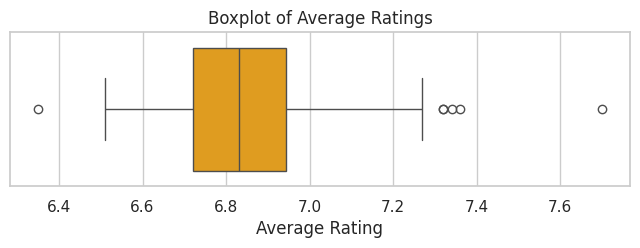

In [121]:
# Boxplot of Average Rating
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['Average Rating'], color='orange')
plt.title('Boxplot of Average Ratings')
plt.show()

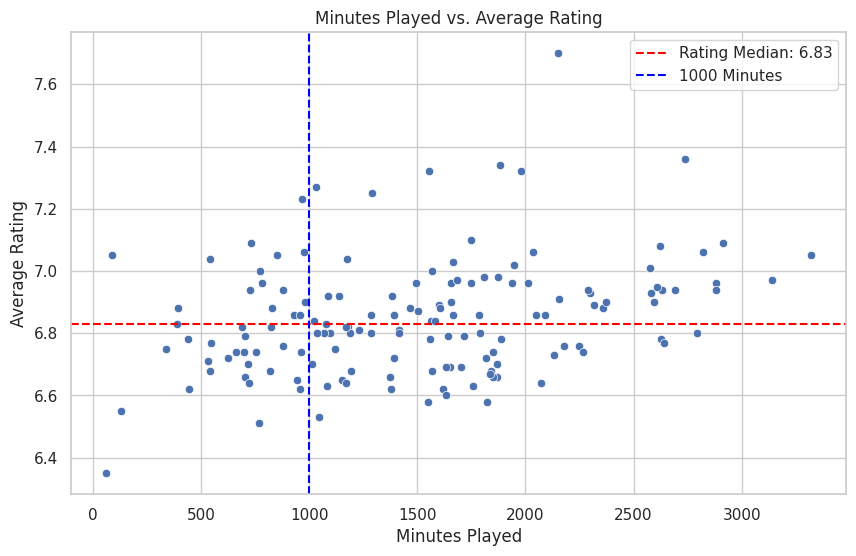

In [122]:
# Scatter Plot - Minutes Played vs. Average Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Minutes Played', y='Average Rating')
plt.title('Minutes Played vs. Average Rating')
plt.xlabel('Minutes Played')
plt.ylabel('Average Rating')

plt.axhline(rating_median, color='red', linestyle='--', label=f'Rating Median: {rating_median:.2f}')
plt.axvline(1000, color='blue', linestyle='--', label='1000 Minutes')

plt.legend()
plt.show()


In [123]:
# Filter the dataframe
filtered_df = df[(df['Average Rating'] > 6.83) & (df['Minutes Played'] > 1000)]

# Display the player names
print(filtered_df['Player Name'])


1               Aaron Mooy
3             Adam Webster
4             Adama Traore
6              Alex Telles
7             Alfie Mawson
10                Angelino
12        Antonee Robinson
13                  Antony
14     Armel Bella Kotchap
15          Arnaut Danjuma
19             Ben Godfrey
27         Bruno Fernandes
35              Cody Gakpo
36          Connor Roberts
38            Darwin Nunez
43         Duje Caleta Car
44            Eberechi Eze
45             Edo Kayembe
47          Enzo Fernandez
51      Federico Fernandez
53            Flynn Downes
55                    Fred
56        Georginio Rutter
64          James Maddison
65            Jarrod Bowen
68           Joao Palhinha
70               Joe Bryan
73            Joel Veltman
74             Jonny Evans
78          Josh Brownhill
81          Julian Alvarez
89        Leandro Trossard
91       Lisandro Martinez
96               Marc Roca
97           Marcos Senesi
98        Marcus Tavernier
100          Matheus Nunes
1

In [124]:
# Filter dataframe by player name (case insensitive)

player_name = 'Serge Aurier'
player_data = df[df['Player Name'].str.lower() == player_name.lower()]


# Display average rating and minutes played for the player
if not player_data.empty:
    avg_rating = player_data['Average Rating'].values[0]
    minutes_played = player_data['Minutes Played'].values[0]  # Check if this column exists exactly
    print(f"Player: {player_name}")
    print(f"Average Rating: {avg_rating}")
    print(f"Minutes Played: {minutes_played}")
else:
    print(f"No data found for player: {player_name}")

Player: Serge Aurier
Average Rating: 6.86
Minutes Played: 1391.5


In [125]:
# Define the threshold for minutes played
minutes_threshold = 1000

# Label successful players
df['Successful'] = (df['Average Rating'] >= rating_median) & (df['Minutes Played'] >= minutes_threshold)

# Check the result
print(df[['Average Rating', 'Minutes Played', 'Successful']].head())


   Average Rating  Minutes Played  Successful
0            6.58          1548.0       False
1            6.86          2089.0        True
2            6.66          1374.0       False
3            6.94          2632.5        True
4            7.10          1749.0        True


In [129]:
# ✅ Players you want to mark as Successful
successful_names = [
    'Sander Berge',
    'Antoine Semenyo',
    'Pape Sarr',
    'Noni Madueke',
    'Ben davies',
    'Luis Diaz',
    'Taiwo Awoniyi',
    'Che Adams'
]

# ✅ Players you want to mark as Not Successful
unsuccessful_names = [
    'Carlos Vinicius',
    'Maximilian Wober',
    'Calvin Ramsay'
]

# 📌 Apply manual updates
df.loc[df['Player Name'].isin(successful_names), 'Successful'] = True
df.loc[df['Player Name'].isin(unsuccessful_names), 'Successful'] = False


In [130]:
# Count how many successful vs. not successful
print("\n✅ Success Label Summary:")
print(df['Successful'].value_counts())


✅ Success Label Summary:
Successful
False    83
True     65
Name: count, dtype: int64


/tmp/ipython-input-131-1174795022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Successful', palette='viridis')


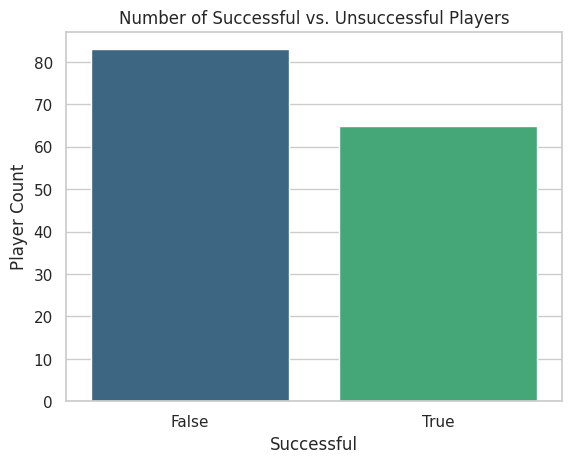

In [131]:
# Bar plot showing count of successful vs not

sns.countplot(data=df, x='Successful', palette='viridis')
plt.title('Number of Successful vs. Unsuccessful Players')
plt.ylabel('Player Count')
plt.show()


In [132]:
# Display manually updated players and their new 'Successful' status
manual_list = successful_names + unsuccessful_names
df[df['Player Name'].isin(manual_list)][['Player Name', 'Average Rating', 'Minutes Played', 'Successful']]


,Player Name,Average Rating,Minutes Played,Successful
11,Antoine Semenyo,6.82,1181.0,True
29,Calvin Ramsay,6.55,132.0,False
31,Carlos Vinicius,6.66,703.5,False
33,Che Adams,6.78,1889.0,True
93,Luis Diaz,7.06,978.5,True
105,Maximilian Wober,7.03,1666.5,False
112,Noni Madueke,7.05,849.5,True
118,Pape Sarr,6.64,1171.0,True
130,Sander Berge,6.80,1034.5,True
138,Taiwo Awoniyi,6.81,1228.5,True


In [133]:
# Save the new labeled DataFrame to CSV
output_filename = 'post_transfer_labeled.csv'

df.to_csv(output_filename, index=False)

from google.colab import files
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>